<a href="https://colab.research.google.com/github/jimpea/mustached-batman/blob/master/benerndsen_(5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Students Guide to Data and Error Analysis

- Herman J. C. Berendsen

This notebook covers the exercises at the end of each chapter

# 3.1

Q: Perform the following operations and give the result with standard deviation. The standard deviations of quantities are indicated by ±; they are
independent of each other.

- (a) 15.000/(5.0 ± 0.1)
- (b) (30.0 ± 0.9)/(5.0 ± 0.2)
- (c) log10(1000 ± 2)
- (d) (20.0 ± 0.3) exp[−(2.00 ± 0.01)]

# A:

## part d

The equation is of the form $a\exp{-b}$, the variance of the product is given by:

$$var_f = (\partial f/\partial a)^2 \sigma_a^2 + (\partial f / \partial b)^2 \sigma_b^2$$

in this case the following partial derivatives were assumed (I checked these with Wolfram Alpha to make sure):

$$\partial f / \partial a = e^{-b}$$

$$\partial f / \partial b = -ae^{-b}$$

In [ ]:
import math
import scipy as sp
from scipy import stats

# a

a = 15.000
b = 5.0
sigma = 0.1

resulta = a / b
sigmaa = resulta*math.sqrt((0.1 / 5)**2)

print(f"a: result: {resulta:.2f} +/- {sigmaa}")

# b
a, siga = 30.0, 0.9
b, sigb = 5.0, 0.2
resultb = a / b

rsig = resultb * math.sqrt((siga/a)**2 + (sigb/b)**2)

print(f"b: result: {resultb:.1f} +/- {rsig:.1f}")

# c
a = 1000
sig = 2

resultc = math.log10(a)
rsig = sig/a/math.log(10)

print(f"c: result: {resultc:.3f} +/- {rsig:.3f}")

# d

a, siga = 20.0, 0.3
b, sigb = 2.00, 0.01
resultd = a * math.exp(-b)
dfda = math.exp(-b)
dfdb = -a * math.exp(-b)
rsig = math.sqrt((dfda * siga)**2 + (dfdb*sigb)**2)


print(f"d: result: {resultd:.2f} +/- {rsig:.3f}, **book answer is 0.06**")

# but book also says that:

percent_sigma = math.sqrt(1.5**2 + 1**2)

# so the sigma should be:

book_rsig = resultd * percent_sigma / 100

print(f"book also gives this figure: {rsig:.3f}, which does agree with my calc")
print("Note: I should show uncertainty at 2 sig fig. I give the 3 sig fig to allow comparison")

a: result: 3.00 +/- 0.06
b: result: 6.0 +/- 0.3
c: result: 3.000 +/- 0.001
d: result: 2.71 +/- 0.049, **book answer is 0.06**
book also gives this figure: 0.049, which does agree with my calc
Note: I should show uncertainty at 2 sig fig. I give the 3 sig fig to allow comparison


# 3.2

Q: The half-life time τ1/2 of a first-order chemical reaction is determined at
four different temperatures. The temperatures are accurate; the standard
uncertainties in τ1/2 are indicated:

Temperature (&deg;C) | half-life τ1/2 (s)
--------------------|------
510 | 2000 ± 100
540 | 600 ± 40
570 | 240 ± 20
600 | 90 ± 10

Determine the rate constant k (what unit?) and its standard uncertainty, as
well as ln k and its standard uncertainty, at every temperature. Now plot ln k
with error bars versus the reciprocal absolute temperature. Also, plot k with
appropriate error bars on a logarithmic scale versus the reciprocal absolute
temperature. Compare the two plots.

A:  This is a first order reaction:

$$x = A_0 e^{-kt}$$

$$A_{1/2} = A_0e^{-kt_{1/2}}$$

$$A_{t/2} / A_0 = 0.5 = e^{-ht_{1/2}}$$

$$ ln(1/2) = -kt_{1/2}$$

$$k = -ln(1/2) / t_{1/2}$$

The standard uncertainty is given by the general statement:

$$\sigma_f^2 =( \partial{f}/\partial{x})^2  \sigma_x^2$$

in this case, we take, maxing $x$ stand for $t_{1/2}$ :

$$\partial{f}/\partial{x} = ln(1/2)/x^2 $$

Thus...

$$\sigma_k = \sqrt{(ln(1/2) /x^2)^2 \sigma_x^2} = f\sigma_x/ x$$

To calculate the error in $ln(k)$ use:

$$\sigma_f = \sigma_x / f$$


In [ ]:
thalves = [2000, 600, 240, 90]
thsigmas = [100, 40, 20, 10]
Ts = [510,540, 570, 600]
recTs = [1/T for T in Ts]

def k(th):
  return -math.log(0.5) / th

kvalues = [k(th) for th in thalves]

def sigmak(k, thsigma, th):
  return   k * thsigma / th
  #return math.sqrt((math.log(0.5) / thsigma**2)**2 * thsigma**2)

ksigmas = [sigmak(k, thsigma, th) for k, thsigma, th in zip(kvalues, thsigmas, thalves)]

lnkvalues = [math.log(k) for k in kvalues]

lnksigmas = [sigmak / k for sigmak, k in zip(ksigmas, kvalues)]


print("(printing k, sigma_k, lnk, sigma_lnk) and percent")
for p in zip(kvalues, ksigmas, lnkvalues, lnksigmas):
  print(p, 100 * p[1]/p[0])


(printing k, sigma_k, lnk, sigma_lnk) and percent
(0.00034657359027997266, 1.7328679513998635e-05, -7.967415380123747, 0.05) 5.000000000000001
(0.0011552453009332421, 7.701635339554947e-05, -6.763442575797811, 0.06666666666666667) 6.666666666666667
(0.0028881132523331052, 0.0002406761043610921, -5.847151843923656, 0.08333333333333334) 8.333333333333334
(0.007701635339554948, 0.0008557372599505498, -4.866322590911929, 0.11111111111111112) 11.11111111111111


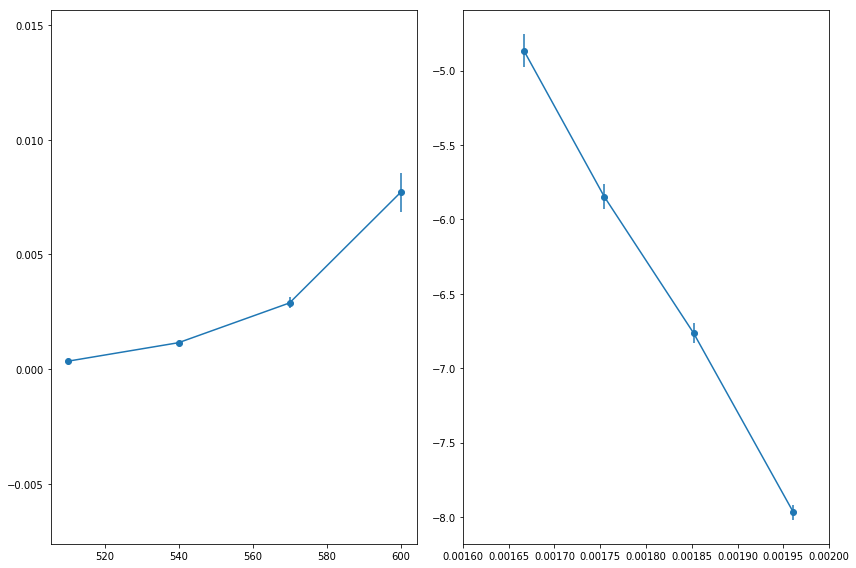

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize= (12, 8))

ax[0].scatter(Ts, kvalues, marker="o")
#ax.plot(kvalues, recTs, ls="", marker="o")

ax[0].errorbar(Ts, kvalues, yerr=ksigmas, label='both limits (default)')

ax[1].scatter(recTs, lnkvalues, marker="o")
#ax.plot(kvalues, recTs, ls="", marker="o")

ax[1].errorbar(recTs, lnkvalues, yerr=lnksigmas, label='both limits (default)')
ax[1].set_xlim(0.0016, 0.002)

fig.tight_layout()


# 3.3

Q: Suppose you determine the acceleration of gravity $g$ by measuring the
oscillation period $T$ of a pendulum with length l. The value of $g$ follows
from

$$g = 4\pi^2l/T^2$$

You measure $T = 2.007 \pm 0.002 s $ and $l = 1.000 \pm 0.002 m$. Determine $g$ and its standard uncertainty

# 4.1

Q: In a lottery 5% of the tickets produce a prize. If I buy ten tickets, what is the probability of winning no prize, 1 prize ... 7. Assume that this is a lottery with replacement, that is the probability of winning a prize does not depend on the number of prozes that I already have.

A: This is a binomial process, every draw has a probability of 0.05 to give a prize. The probability of winning $k$ prizes from $n$ draws is:

$$f(k, n) = {n \choose k} p^k(1 - p)^{n - k}$$

where:

$${n \choose k} = \frac{n!}{k! (n-k)!}$$

$$mean: \mu = E[k] = pn$$

$$variance: \sigma^2 = E[(k - \mu)^2]$$


$$sd: \sigma = \sqrt{p((1 - p)n}$$


# 4.2

Q: When it is known that one measurement $x$ has probability of exceeding a given value $x_m$ of 1 percent, what then is the probability that _at least_ one measurement in a series of 20 independent measurements will exceed $x_m$.

A: Again, this is a binomial probability distribution and we simply need to calculate the probability of measureing $k = 0$ excess responses in 20 measurements

In [ ]:
k = 0
p = 0.01
n = 20

prob = 1 - stats.binom.pmf(k, n, p)
print(f"probability of no excess measurements: {prob}")
print(f"Note: very close to the expected mean np = {n*p}")



probability of no excess measurements: 0.18209306240276923
Note: very close to the expected mean np = 0.2


# 4.3

Q: There will be elections in which people can select one of two presedential candidates. You want to conduct an opinion poll and predict the outcome with a standard uncertainty of 1 percent. You expect roughly equal votes for either candidate. Assuming that you are able to obtain the opinion of a random unbiased selection of voters, how many people do you have to select, (what should be your sample size).

A: This seems like a binomial process with p = 0.5 for a vote for one of the candidates.  We expect each candidate to get half the votes: n/ 2, where n is the total number of votes cast. We wish for a standard deviation of 0.01 * n/2. For a binonial process, the standard deviation is given by:

$$sd = \sqrt{p (1-p) n}$$

hence:

$$sd = n / 200 $$

$$n^2 = 200 p(1-p)n$$

$$n = 200 ^2 0.5 (0.5) $$

In [ ]:
n = 200 * 200 * 0.5 * 0.5
print(f"sample size required for uncertainty of 1% is: {n}")

sample size required for uncertainty of 1% is: 10000.0


# 4.4

Q: You observed $n$ independent events, each of which have an outcome of 0 or 1. You count $k_0$ zeros and $k_1$ ones $(k_0 + k_1) = n$

- a. What is your best estimate of the probability that a one appears.
- b.  Give an estimate for the standard uncertainty in $k_0$.
- c. What is the standard uncertainty in $k_1$
- d. You are finally interested in the ratio $r = k_1 / k_0$, what is the standard uncertainty in $r$.

A:

This is a Binomial process. The following is wrong:

    - a $p(k_1) = k_1 / n$
    - b: standard uncertainty in $k_1$ is: $\sqrt{p(1-p)n}$.
    - c: standard uncertainty in $k_0$ is given by the same expression where $p(k_0)  = k_0 / n$.
    - d: standard uncertainty of $r$ is given by:

    $$r\sqrt{(\sigma_1 / k_1)^2 + (\sigma_0 / k_0)^2}$$